In [37]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import pickle

In [31]:
CFIN_Paths = [x for x in Path('/mnt/projects/VIA_Vlad/nobackup/BrainVisa/BrainVisa/CFIN').iterdir() if x.is_dir()]
DRCMR_Paths = [x for x in Path('/mnt/projects/VIA_Vlad/nobackup/BrainVisa/BrainVisa/DRCMR').iterdir() if x.is_dir()]
subjects_paths = CFIN_Paths + DRCMR_Paths

In [36]:
sulc_morph_suffix = 't1mri/default_acquisition/default_analysis/folds/3.1/default_session_auto'
depthprof_suffix = 'sulci'

subject_features = {}

for subj in tqdm(subjects_paths):
    subject = subj.name
    sulc_morph_path = (subj / sulc_morph_suffix)/f'{subject}_default_session_auto_sulcal_morphometry.csv'
    depthprof_path = subj / depthprof_suffix
    
    subj_feat = {}
    
    try:
        subj_feat['morphology'] = pd.read_csv(sulc_morph_path,  sep=';')
    except:
        print(f'No sulcal morphology for {subject}')
        subj_feat['morphology'] = pd.DataFrame()
        continue
    try:
        subj_feat['depth_profile_L'] = pd.read_table(depthprof_path/f'{subject}_L_CS-depth.txt',
                                                names=['index', 'depth', 'profile']).set_index('index')
    except:
        print(f'No depth profile for {subject}')
        subj_feat['depth_profile_L'] = pd.DataFrame()
        
    try:
        subj_feat['depth_profile_R'] = pd.read_table(depthprof_path/f'{subject}_R_CS-depth.txt',
                                                   names=['index', 'depth', 'profile']).set_index('index')
    except:
        print(f'No depth profile for {subject}')
        subj_feat['depth_profile_R'] = pd.DataFrame()
    try:
        subj_feat['medial_axis_L'] = pd.read_table(depthprof_path/f'{subject}_L_CS-medial_axis.txt',
                                                   names=['index', 'depth', 'profile']).set_index('index')
    except:
        print(f'No medial axis for {subject}')
        subj_feat['medial_axis_L'] = pd.DataFrame()
    try:
        subj_feat['medial_axis_R'] = pd.read_table(depthprof_path/f'{subject}_R_CS-medial_axis.txt',
                                                   names=['index', 'depth', 'profile']).set_index('index')
    except:
        print(f'No medial axis for {subject}')
        subj_feat['medial_axis_R'] = pd.DataFrame()

    subject_features[subject] = subj_feat

 45%|████▌     | 139/307 [00:01<00:01, 141.34it/s]

No sulcal morphology for sub-via419


 55%|█████▌    | 170/307 [00:01<00:00, 146.14it/s]

No sulcal morphology for sub-via510


 86%|████████▌ | 264/307 [00:01<00:00, 155.54it/s]

No sulcal morphology for sub-via244
No sulcal morphology for sub-via286


100%|██████████| 307/307 [00:02<00:00, 139.09it/s]


In [39]:
pd.to_pickle(subject_features, '../data/bvisa_subject_features.pkl')

In [29]:
pd.read_csv(sulc_morph_path, sep=';')

,sulcus,label,side,surface_talairach,surface_native,maxdepth_talairach,maxdepth_native,meandepth_talairach,meandepth_native,hull_junction_length_talairach,hull_junction_length_native,GM_thickness,opening
0,F.C.L.a._left,F.C.L.a.,left,2598.71,2425.23,14.18,13.64,9.39,9.08,84.02,81.04,4.35,3.20
1,F.C.L.a._right,F.C.L.a.,right,3210.21,2983.79,19.68,18.90,8.78,8.46,128.00,123.56,4.13,2.44
2,F.C.L.p._left,F.C.L.p.,left,6347.33,5908.65,42.86,41.68,21.44,20.83,115.50,110.84,3.79,1.27
3,F.C.L.p._right,F.C.L.p.,right,6834.85,6367.58,26.42,25.30,12.48,12.08,126.20,121.14,3.89,1.16
4,F.C.L.r.ant._left,F.C.L.r.ant.,left,690.46,640.22,28.80,27.72,14.69,14.19,8.98,8.62,3.45,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,S.T.s.ter.asc.post._right,S.T.s.ter.asc.post.,right,2526.72,2349.47,29.66,28.68,22.60,21.89,56.18,54.06,5.02,0.13
119,S.p.C._left,S.p.C.,left,1067.53,991.48,13.46,13.12,8.91,8.64,65.76,63.38,3.65,1.91
120,S.p.C._right,S.p.C.,right,294.52,273.22,14.60,14.02,10.54,10.14,15.46,14.96,3.90,2.19
121,S.s.P._left,S.s.P.,left,2338.75,2176.05,17.54,17.10,9.18,8.95,130.62,125.12,3.70,0.58


<Axes: xlabel='index'>

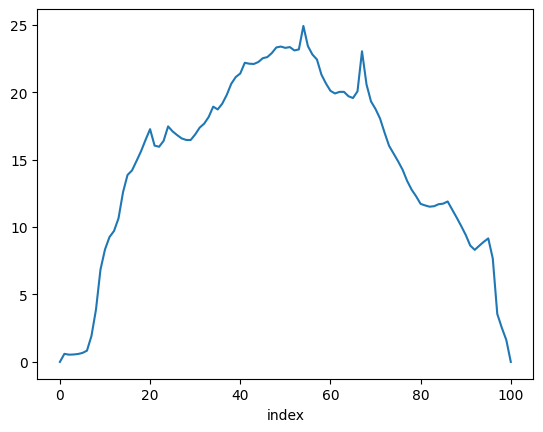

In [18]:
t.depth_curve.plot()

<Axes: xlabel='index'>

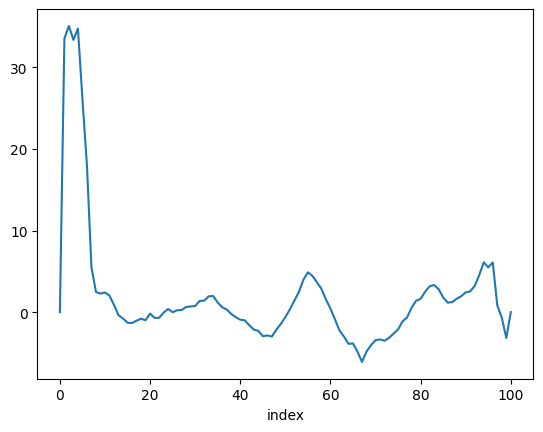

In [19]:
t.sulcal_profile.plot()